# Apercu du projet
Ce projet vise à analyser la production mondiale de plastique, son traitement (recyclage, incinération, enfouissement, mauvaise gestion)
et à modéliser la relation entre ces variables à l’aide d’algorithmes de machine learning (Random Forest, Gradient Boosting, Régression Linéaire).Nous allons prédire la part de plastique mal gérée et de comprendre les dynamiques globales de la pollution plastique. 
Et Proposer à la fin des recommandations politiques basées sur les données


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
#chargement des données
df = pd.read_csv('data/global-plastics-production.csv')
df1 = pd.read_csv('data/share-plastic-fate.csv')
df2 = pd.read_csv('data/mismanaged-plastic-waste-per-capita.csv')


In [7]:
#Apercu des données
display(df.head())
display(df1.head())
display(df2.head())

,Entity,Code,Year,Annual plastic production between 1950 and 2019
0,World,OWID_WRL,1950,2000000
1,World,OWID_WRL,1951,2000000
2,World,OWID_WRL,1952,2000000
3,World,OWID_WRL,1953,3000000
4,World,OWID_WRL,1954,3000000


,Entity,Code,Year,Share of waste recycled from total regional waste,Share of waste incinerated from total regional waste,Share of littered and mismanaged from total regional waste,Share of waste landfilled from total regional waste
0,Americas (excl. USA),NaN,2000,4.721963,1.220057,32.702644,61.355328
1,Americas (excl. USA),NaN,2001,4.972505,1.208672,32.651270,61.167557
2,Americas (excl. USA),NaN,2002,5.227469,1.197566,32.610554,60.964405
3,Americas (excl. USA),NaN,2003,5.482511,1.186352,32.546440,60.784700
4,Americas (excl. USA),NaN,2004,5.740007,1.175283,32.480970,60.603745


,Entity,Code,Year,Mismanaged plastic waste per capita (kg per year)
0,Africa,NaN,2019,10.465928
1,Albania,ALB,2019,24.239153
2,Algeria,DZA,2019,17.758995
3,Angola,AGO,2019,7.445279
4,Antigua and Barbuda,ATG,2019,6.463918


In [15]:
#Vérifications des données
print('Global plasctics production')
display(df.describe())
print('\nshare plastic fate')
display(df1.describe())
print('\nmismanaged plastic waste per capita')
display(df2.describe())


Global plasctics production


,Year,Annual plastic production between 1950 and 2019
count,69.000000,6.900000e+01
mean,1984.652174,1.375638e+08
std,20.460023,1.320418e+08
min,1950.000000,2.000000e+06
25%,1967.000000,2.300000e+07
50%,1985.000000,9.000000e+07
75%,2002.000000,2.310000e+08
max,2019.000000,4.597460e+08



share plastic fate


,Year,Share of waste recycled from total regional waste,Share of waste incinerated from total regional waste,Share of littered and mismanaged from total regional waste,Share of waste landfilled from total regional waste
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2009.500000,6.364439,10.541669,32.703471,50.390421
std,5.780751,2.587257,9.132355,20.154271,16.346958
min,2000.000000,2.345074,0.000000,3.552523,25.098991
25%,2004.750000,4.362588,1.128528,10.955612,33.711067
50%,2009.500000,5.716396,11.009693,32.513705,51.571503
75%,2014.250000,7.920186,16.964613,45.841763,60.648984
max,2019.000000,13.333093,37.823994,69.322820,75.051970



mismanaged plastic waste per capita


,Year,Mismanaged plastic waste per capita (kg per year)
count,165.0,165.000000
mean,2019.0,8.564164
std,0.0,10.485455
min,2019.0,0.002720
25%,2019.0,0.500787
50%,2019.0,5.981680
75%,2019.0,12.510074
max,2019.0,69.515864


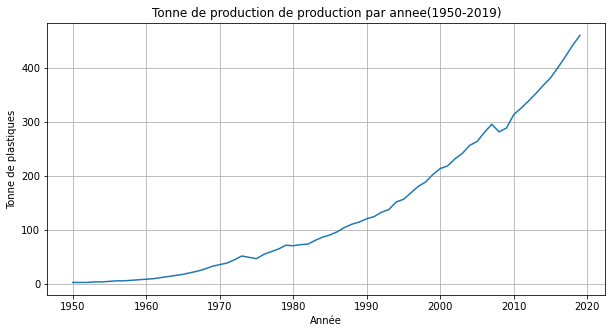

In [22]:
#Visualisation de la production globale
plt.figure(figsize=(10,5))

prod = df.columns[3]
plt.plot(df['Year'],df[prod] / 1e6)
plt.title("Tonne de production de production par annee(1950-2019)")
plt.xlabel("Année")
plt.ylabel("Tonne de plastiques")
plt.grid(True)
plt.show()

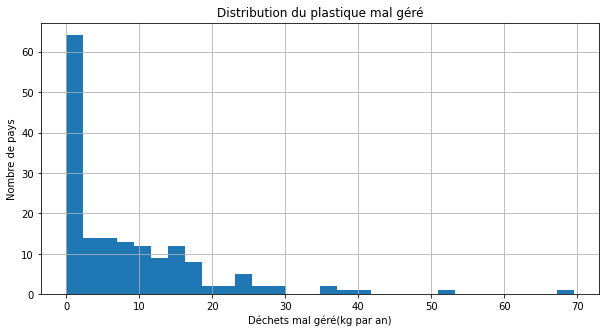

In [21]:
#Visualisation de la distribution du plastique mal géré
plt.figure(figsize=(10,5))

waste = df2.columns[3]
plt.hist(df2[waste].dropna(),bins=30)
plt.title("Distribution du plastique mal géré")
plt.xlabel("Déchets mal géré(kg par an)")
plt.ylabel("Nombre de pays")
plt.grid(True)
plt.show()

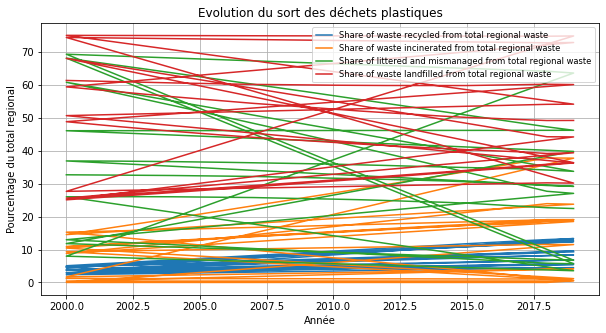

In [24]:
#Visualisation du sort des déchets
cols = [i for i in df1.columns if 'Share of' in i]
plt.figure(figsize=(10,5))
for i in cols:
    plt.plot(df1['Year'], df1[i],label=i)

plt.title("Evolution du sort des déchets plastiques")
plt.xlabel("Année")
plt.ylabel("Pourcentage du total regional")
plt.legend(loc='best', fontsize='small')
plt.grid(True)
plt.show()

In [ ]:
#Observations 

waste = df2.columns[3]
top10 = df2.sort_values(by=waste, ascending=False).head(10)[['Entity', waste]]
print('Top 10 des pays avec le plus de déchets mal gérés')
display(top10)

Top 10 des déchets mal gérés


,Entity,Mismanaged plastic waste per capita (kg per year)
27,Comoros,69.515864
151,Trinidad and Tobago,52.429391
143,Suriname,39.471601
116,Philippines,37.230963
164,Zimbabwe,35.839194
61,Guyana,35.204342
147,Tanzania,29.590553
84,Libya,27.819832
158,Uruguay,26.753322
87,Malaysia,25.491518


In [36]:
#Fusionnons les datasets
df3 = df2.merge(df1, on=['Entity','Year'], how='inner')
df3 = df3.merge(df[['Year','Annual plastic production between 1950 and 2019']],on='Year',how='left')
df3.head()

,Entity,Code_x,Year,Mismanaged plastic waste per capita (kg per year),Code_y,Share of waste recycled from total regional waste,Share of waste incinerated from total regional waste,Share of littered and mismanaged from total regional waste,Share of waste landfilled from total regional waste,Annual plastic production between 1950 and 2019
0,China,CHN,2019,8.559308,CHN,12.801141,23.762764,27.052067,36.384026,459746020
1,Europe,NaN,2019,1.580226,NaN,12.384406,37.747390,5.667553,44.200645,459746020
2,India,IND,2019,9.509608,IND,13.333093,4.160816,46.214355,36.291730,459746020
3,Oceania,NaN,2019,3.240268,NaN,6.870983,11.508256,6.754649,74.866110,459746020
4,United States,USA,2019,0.812815,USA,4.488883,19.078592,3.552523,72.880005,459746020


In [38]:
#Nettoyage des données
df3 = df3.dropna(subset=['Mismanaged plastic waste per capita (kg per year)'])
       
for c in ['Share of waste recycled from total regional waste','Share of waste incinerated from total regional waste','Share of littered and mismanaged from total regional waste','Share of waste landfilled from total regional waste']:
    if c in df3.columns:
        df3[c] = df3[c].fillna(df3[c].median())
    df3.isna().sum()

In [45]:
# Feature engineering
df3['management_index'] = df3['Share of waste recycled from total regional waste'] + df3['Share of waste incinerated from total regional waste'] - df3['Share of littered and mismanaged from total regional waste']
df3['log_production'] = np.log1p(df3['Annual plastic production between 1950 and 2019'])

features = ['Share of waste recycled from total regional waste','Share of waste incinerated from total regional waste','Share of littered and mismanaged from total regional waste','Share of waste landfilled from total regional waste','management_index','log_production','Year']
X = df3[features]
y = df3['Mismanaged plastic waste per capita (kg per year)']

print('Features used:', features)
X.head()
    

Features used: ['Share of waste recycled from total regional waste', 'Share of waste incinerated from total regional waste', 'Share of littered and mismanaged from total regional waste', 'Share of waste landfilled from total regional waste', 'management_index', 'log_production', 'Year']


,Share of waste recycled from total regional waste,Share of waste incinerated from total regional waste,Share of littered and mismanaged from total regional waste,Share of waste landfilled from total regional waste,management_index,log_production,Year
0,12.801141,23.762764,27.052067,36.384026,9.511838,19.946185,2019
1,12.384406,37.747390,5.667553,44.200645,44.464243,19.946185,2019
2,13.333093,4.160816,46.214355,36.291730,-28.720446,19.946185,2019
3,6.870983,11.508256,6.754649,74.866110,11.624590,19.946185,2019
4,4.488883,19.078592,3.552523,72.880005,20.014952,19.946185,2019


In [46]:
# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(4, 7) (2, 7)


In [48]:
# Modèle de base: Regression lineaire
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print('Regression linéaire performance:')
print('RMSE:', mean_squared_error(y_test,y_pred_lr,squared=False))
print('MAE:', mean_absolute_error(y_test,y_pred_lr))
print('R2:', r2_score(y_test,y_pred_lr))

Regression linéaire performance:
RMSE: 14.296013525513457
MAE: 12.961454203201257
R2: -15.783913957100548


In [49]:
#Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print('Random Forest performance:')
print('RMSE:', mean_squared_error(y_test,y_pred_rf,squared=False))
print('MAE:', mean_absolute_error(y_test,y_pred_rf))
print('R2:', r2_score(y_test,y_pred_rf))

Random Forest performance:
RMSE: 2.7692836632719833
MAE: 2.724143270794999
R2: 0.37020641736104554


In [50]:
#Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=200, random_state = 42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print('Gradient Boosting performance:')
print('RMSE:', mean_squared_error(y_test,y_pred_gb,squared=False))
print('MAE:', mean_absolute_error(y_test,y_pred_gb))
print('R2:', r2_score(y_test,y_pred_gb))

Gradient Boosting performance:
RMSE: 3.1194326165596133
MAE: 2.621899500434486
R2: 0.20087528739398164


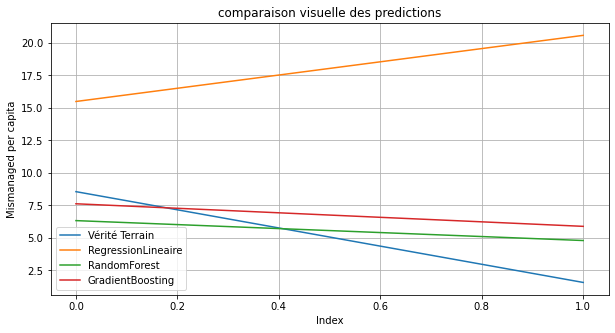

In [51]:
#comparaison visuelle des predictions
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Vérité Terrain')
plt.plot(y_pred_lr, label='RegressionLineaire')
plt.plot(y_pred_rf, label='RandomForest')
plt.plot(y_pred_gb, label='GradientBoosting')
plt.title("comparaison visuelle des predictions")
plt.xlabel("Index")
plt.ylabel("Mismanaged per capita")
plt.legend()
plt.grid(True)
plt.show()